<a href="https://colab.research.google.com/github/Debora96/ArticleXAI/blob/main/SHAP_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load the dataset
from google.colab import files

uploaded = files.upload()

Saving LUSC_ALL.csv to LUSC_ALL.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['LUSC_ALL.csv']))
print(df)

    neoplasm metastasis ajcc.stage  obs.time  status   age  gender  prior.dx  \
0         N1         M0        T2b       455       1  62.0       1         0   
1         N0         M0        T1b       247       0  56.0       1         0   
2         N0         MX        T1b       378       0  74.0       1         0   
3         N0         M0        T2b       544       1  76.0       1         1   
4         N0         M0        T2a        55       0  68.0       1         0   
..       ...        ...        ...       ...     ...   ...     ...       ...   
488       N1        NaN         T4        12       1  65.0       1         0   
489       NX         M0        T1a       910       0  60.0       0         0   
490       N1         MX        T2a        82       0  45.0       0         0   
491       N1         M1         T4       716       1  73.0       1         0   
492       N1         M0         T2       358       1  56.0       1         0   

          GCLC     WNT16  ...  LINC0166

In [ ]:
rotulos_unicos = df['ajcc.stage'].unique()

# Imprimindo os rótulos únicos
print(rotulos_unicos)

['T2b' 'T1b' 'T2a' 'T2' 'T1' 'T1a' 'T3' 'T4']


In [ ]:
mapeamento = {'T1': 0, 'T1a': 0,'T1b':0,'T2':0,'T2a':0,'T2b':0,'T3':1,'T4':1}

# Substituir os rótulos 'T1' e 'T1a' pelo rótulo '1'
df['ajcc.stage'] = df['ajcc.stage'].replace(mapeamento)

<ipython-input-4-de37a9439484>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ajcc.stage'] = df['ajcc.stage'].replace(mapeamento)


In [ ]:
df.head()

,neoplasm,metastasis,ajcc.stage,obs.time,status,age,gender,prior.dx,GCLC,WNT16,...,LINC01667,CH507.42P11.6,KCNIP4.IT1,SH3PXD2A.AS1,PCAT5,LINC01202,ELDR,SCHLAP1,LINC00891,PAUPAR
0,N1,M0,0,455,1,62.0,1,0,13.535154,5.857981,...,2.321928,2.000000,1.584963,8.764872,0.0,3.000000,0.0,3.700440,2.807355,1.0
1,N0,M0,0,247,0,56.0,1,0,12.279320,2.321928,...,4.459432,2.321928,0.000000,3.169925,1.0,4.000000,0.0,0.000000,2.584963,0.0
2,N0,MX,0,378,0,74.0,1,0,12.867279,5.954196,...,5.129283,2.321928,1.000000,7.930737,1.0,1.000000,3.0,3.807355,4.169925,0.0
3,N0,M0,0,544,1,76.0,1,1,10.674192,6.375039,...,0.000000,0.000000,1.000000,7.383704,0.0,1.584963,1.0,5.169925,2.807355,0.0
4,N0,M0,0,55,0,68.0,1,0,10.673309,6.087463,...,0.000000,4.169925,1.000000,6.672425,0.0,3.459432,0.0,0.000000,3.700440,0.0


In [ ]:
contagem_por_classe = df['ajcc.stage'].value_counts()

# Exibir a contagem por classe
print(contagem_por_classe)

ajcc.stage
0    400
1     93
Name: count, dtype: int64


In [ ]:
Genes_selc = ['ALDH3B1', 'ALG1L', 'C7', 'CAV1', 'CENPI', 'GKN2', 'GPRC5A',
       'H2AC14', 'LINC00887', 'MMP20', 'PCAT7', 'TNS4', 'KRT17P1',
       'GSDMC', 'HMGB3P6', 'CSTL1', 'GCGR', 'BMP7', 'TFAP2A', 'PLXNB3',
       'CDT1', 'COL9A3', 'TMPRSS4', 'LINC02830', 'GNG4', 'PPFIA4',
       'CACNA1I', 'PLAAT1', 'ONECUT3', 'IMPDH1P8', 'RCOR2', 'FTCD',
       'PPP1R27', 'GINS2', 'ESCO2', 'MYOSLID', 'PDE10A', 'DUXAP9']

In [ ]:
df_selc = df[Genes_selc]
print(df_selc)


       ALDH3B1      ALG1L         C7       CAV1     CENPI      GKN2  \
0     8.971544   9.209453   8.851749  11.576957  9.231221  0.000000   
1     9.807355   9.219169   5.807355   9.807355  7.965784  2.584963   
2    10.500842   8.703904  11.872675  12.721313  8.867279  0.000000   
3     9.556506   8.558421  14.112847  13.756244  7.912889  6.409391   
4     9.375039   9.566054  11.294046  13.635718  6.108524  5.285402   
..         ...        ...        ...        ...       ...       ...   
488   7.982994  10.807355   9.355351  10.793603  8.870365  3.000000   
489  10.556506   3.584963  10.821774  12.286847  6.539159  8.247928   
490   9.388017  10.019591  11.859146  13.428491  9.368506  5.169925   
491   9.219169  10.767357   9.400879  14.595316  8.734710  1.584963   
492   9.211888  11.801304  10.278449  10.388017  8.447083  3.807355   

        GPRC5A    H2AC14  LINC00887     MMP20  ...   ONECUT3  IMPDH1P8  \
0    12.834274  3.459432   6.392317  2.807355  ...  5.554589  3.321928   

In [ ]:
data = pd.DataFrame(df)

In [ ]:
#Preparing input and output variables
X = df_selc
y = data[data.columns[2:3]]

In [ ]:
pip install shap

In [ ]:
import sklearn
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0
#)


In [ ]:
y = y.values.ravel()


Imbalanced-learn (imblearn)

É uma biblioteca amplamente utilizada para lidar com dados desbalanceados. Contém várias técnicas de reamostragem, como sobremuestreamento (oversampling) e subamostragem (undersampling).

In [ ]:
pip install imbalanced-learn

SMOTE (Synthetic Minority Over-sampling Technique): Gera exemplos sintéticos para a classe minoritária.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res1, y_res1 = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
print(X_res1)

       ALDH3B1     ALG1L         C7       CAV1      CENPI      GKN2  \
0     8.971544  9.209453   8.851749  11.576957   9.231221  0.000000   
1     9.807355  9.219169   5.807355   9.807355   7.965784  2.584963   
2    10.500842  8.703904  11.872675  12.721313   8.867279  0.000000   
3     9.556506  8.558421  14.112847  13.756244   7.912889  6.409391   
4     9.375039  9.566054  11.294046  13.635718   6.108524  5.285402   
..         ...       ...        ...        ...        ...       ...   
795  10.694364  8.709414  12.679700  15.167059   9.236461  7.410105   
796  10.072593  9.065359   8.445827  11.696734  10.383849  0.000000   
797  10.093779  7.590837   8.574790  13.730214   8.668535  1.000000   
798  10.673524  8.592384   7.092536   9.758169   8.472292  1.154089   
799   9.353690  7.875020  11.398618  13.574461   9.162289  5.827622   

        GPRC5A    H2AC14  LINC00887     MMP20  ...   ONECUT3  IMPDH1P8  \
0    12.834274  3.459432   6.392317  2.807355  ...  5.554589  3.321928   

In [ ]:
print(y_res1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 

In [ ]:
#contagem_por_classe1 = y_res1.value_counts()

# Exibir a contagem por classe
#print(contagem_por_classe1)

In [ ]:
# Split the data into training and test sets
#X_train_res1, X_test_res1, y_train_res1, y_test_res1 = train_test_split(X_res1, y_res1, test_size=0.3, random_state=0
#)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, f1_score, precision_score,
    recall_score, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_classifier = RandomForestClassifier()

# Realizar a validação cruzada com 5 folds
scores_rf = cross_val_score(rf_classifier, X_res1, np.squeeze(y_res1), cv=5)
f1_scores = cross_val_score(rf_classifier, X_res1, y_res1, cv=5, scoring='f1')

# Exibir os resultados
print("Acurácia Média:", np.mean(scores_rf))
print(f'F1 scores por fold: {f1_scores}')
print(f'Média do F1 score: {f1_scores.mean()}')

Acurácia Média: 0.925
F1 scores por fold: [0.80555556 0.95597484 0.93975904 0.93251534 0.93251534]
Média do F1 score: 0.9132640218628112


In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Certificar que y_res1 está no formato unidimensional
y_res1 = np.squeeze(y_res1)

# Instanciar o Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Definir a validação cruzada com 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Variáveis para armazenar os resultados
f1_scores = []
accuracy_scores = []

# Loop pela validação cruzada
for train_index, test_index in kf.split(X_res1, y_res1):
    # Dividir os dados em treino e validação usando iloc para DataFrame
    X_train, X_test = X_res1.iloc[train_index], X_res1.iloc[test_index]
    y_train, y_test = y_res1[train_index], y_res1[test_index]

    # Treinar o modelo no conjunto de treino
    rf_classifier.fit(X_train, y_train)

    # Fazer predições no conjunto de validação
    y_pred = rf_classifier.predict(X_test)

    # Calcular a acurácia e F1 score no conjunto de validação
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Armazenar os resultados
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Após todos os folds, calcular as médias de acurácia e F1
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)

# Exibir os resultados
print(f"Acurácias por fold: {accuracy_scores}")
print(f"F1 scores por fold: {f1_scores}")
print(f"Média da acurácia: {mean_accuracy}")
print(f"Média do F1 score: {mean_f1}")


Acurácias por fold: [0.90625, 0.9375, 0.90625, 0.91875, 0.88125]
F1 scores por fold: [0.9101796407185628, 0.9358974358974359, 0.9056603773584906, 0.9171974522292994, 0.8805031446540881]
Média da acurácia: 0.9099999999999999
Média do F1 score: 0.9098876101715753


**Figure 3**

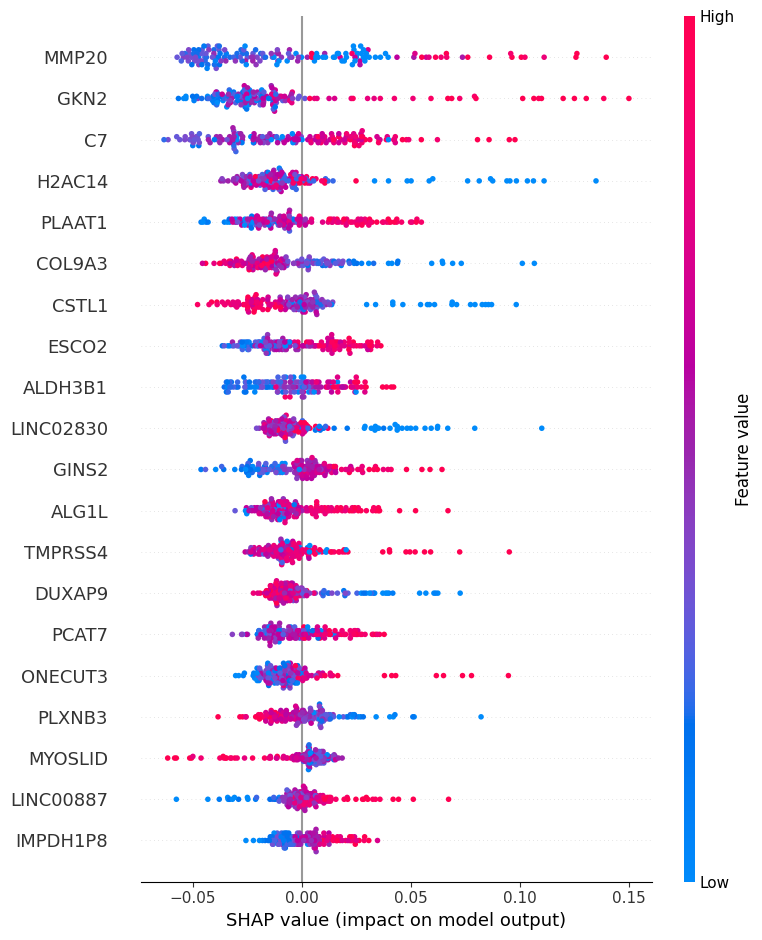

In [ ]:
 # Usar o SHAP para explicar as predições no conjunto de validação #inserir seed
import shap
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test)

shap.initjs()
shap.summary_plot(shap_values[..., 0], X_test)

In [ ]:
# Usar o SHAP para explicar as predições no conjunto de validação
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Certificar que y_res1 está no formato unidimensional
y_res1 = np.squeeze(y_res1)

# Instanciar o Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Definir a validação cruzada com 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Variáveis para armazenar os resultados
f1_scores = []
accuracy_scores = []

# Loop pela validação cruzada
for train_index, test_index in kf.split(X_res1, y_res1):
    # Dividir os dados em treino e validação usando iloc para DataFrame
    X_train, X_test = X_res1.iloc[train_index], X_res1.iloc[test_index]
    y_train, y_test = y_res1[train_index], y_res1[test_index]

    # Treinar o modelo no conjunto de treino
    rf_classifier.fit(X_train, y_train)

    # Fazer predições no conjunto de validação
    y_pred = rf_classifier.predict(X_test)

    # Calcular a acurácia e F1 score no conjunto de validação
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Armazenar os resultados
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Após todos os folds, calcular as médias de acurácia e F1
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)

# Exibir os resultados
print(f"Acurácias por fold: {accuracy_scores}")
print(f"F1 scores por fold: {f1_scores}")
print(f"Média da acurácia: {mean_accuracy}")
print(f"Média do F1 score: {mean_f1}")

Acurácias por fold: [0.90625, 0.9375, 0.90625, 0.91875, 0.88125]
F1 scores por fold: [0.9101796407185628, 0.9358974358974359, 0.9056603773584906, 0.9171974522292994, 0.8805031446540881]
Média da acurácia: 0.9099999999999999
Média do F1 score: 0.9098876101715753


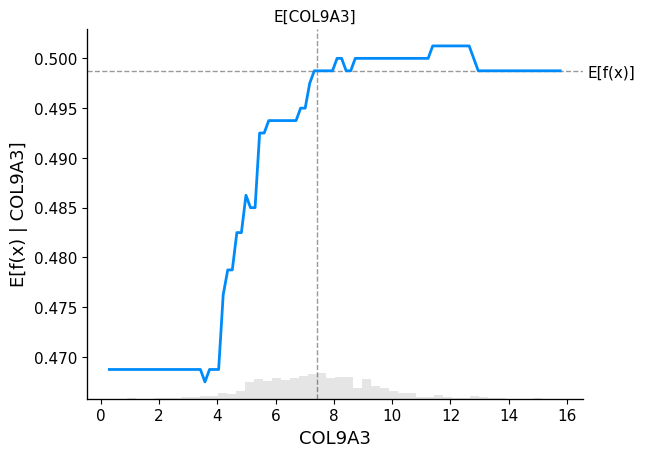

In [ ]:
shap.partial_dependence_plot(
    "COL9A3",
    rf_classifier.predict,
    X_res1,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

PermutationExplainer explainer: 161it [00:55,  2.36it/s]


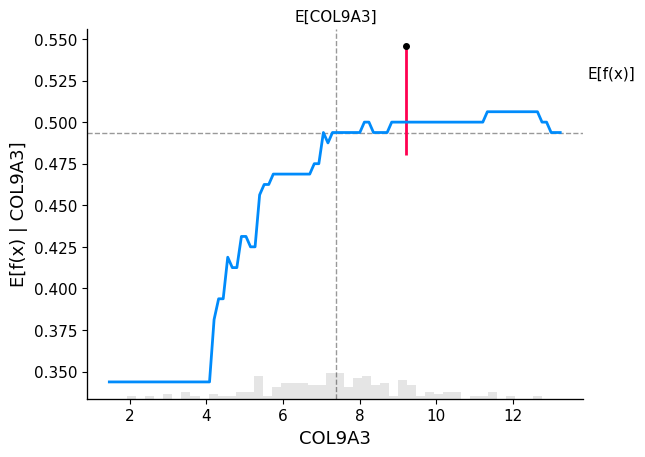

In [ ]:
# compute the SHAP values for the model
explainer = shap.Explainer(rf_classifier.predict, X_test)
shap_values = explainer(X_test)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "COL9A3",
    rf_classifier.predict,
    X_test,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

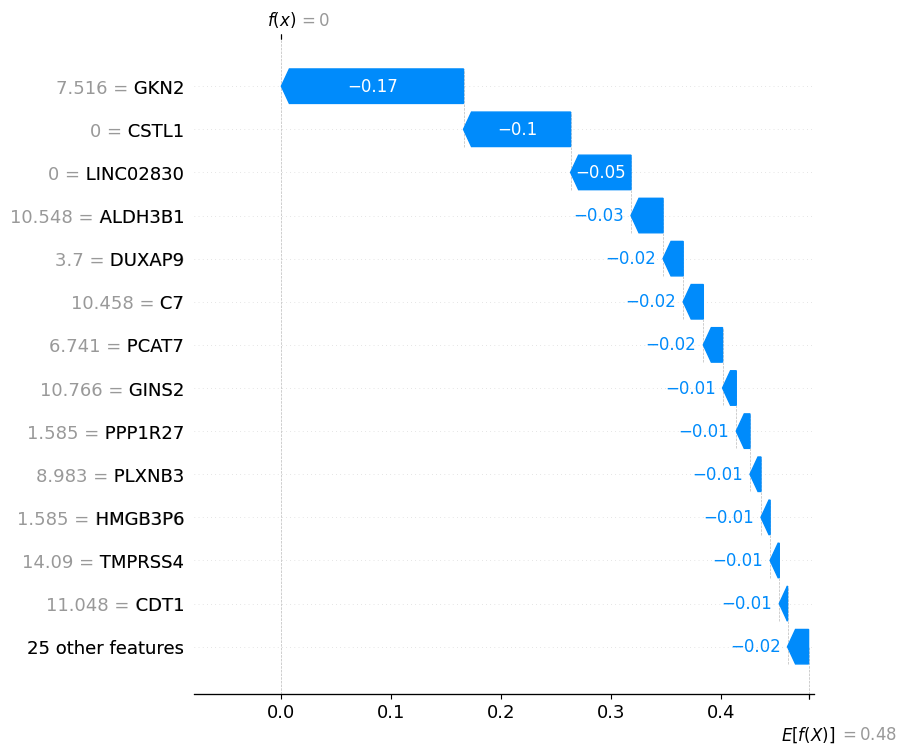

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[68], max_display=14)

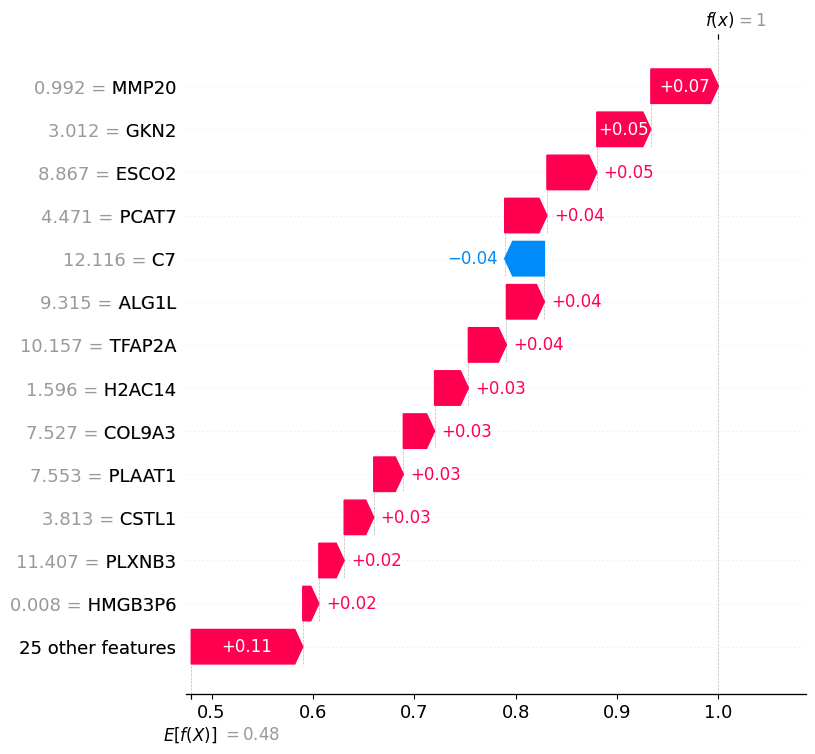

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[150], max_display=14)

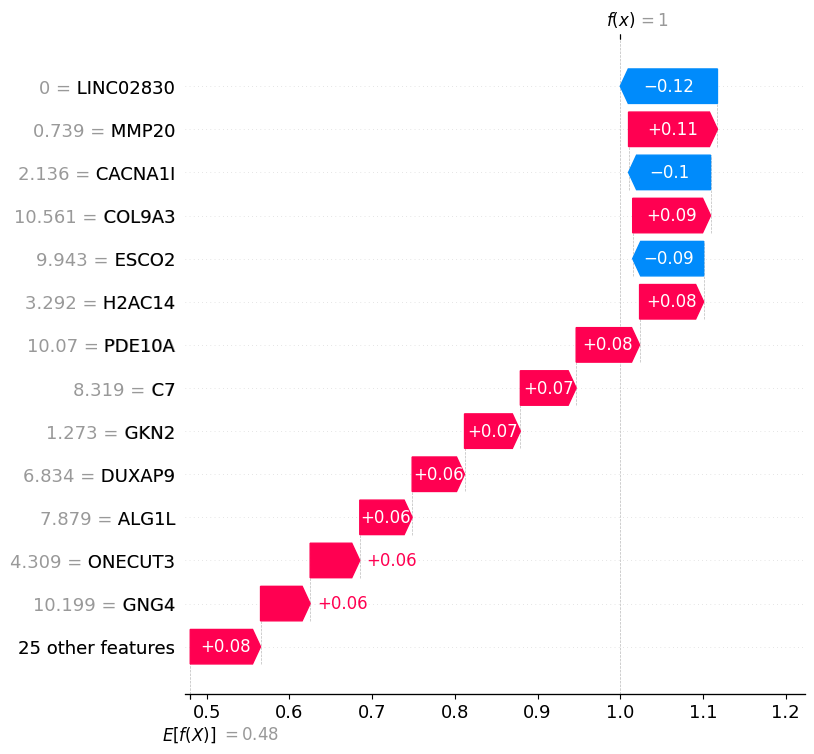

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[145], max_display=14)

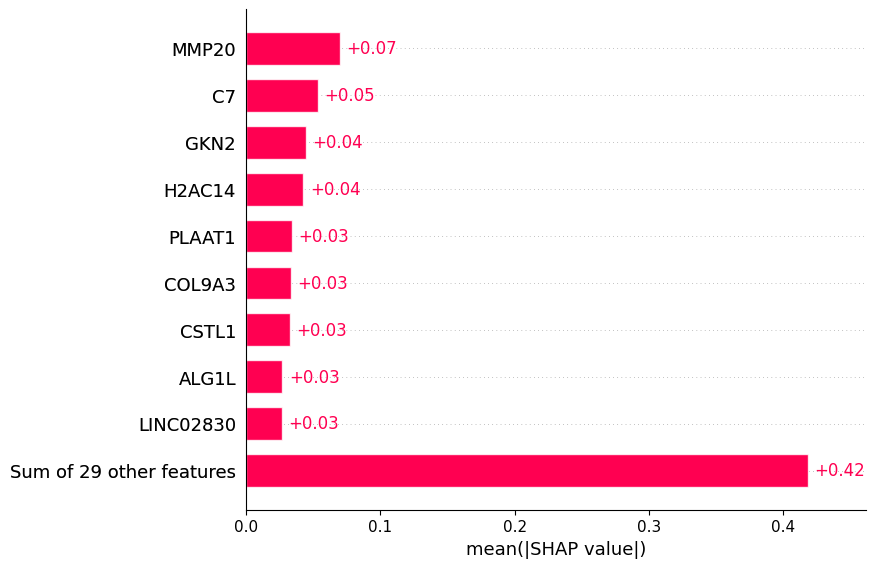

In [ ]:
shap.plots.bar(shap_values)

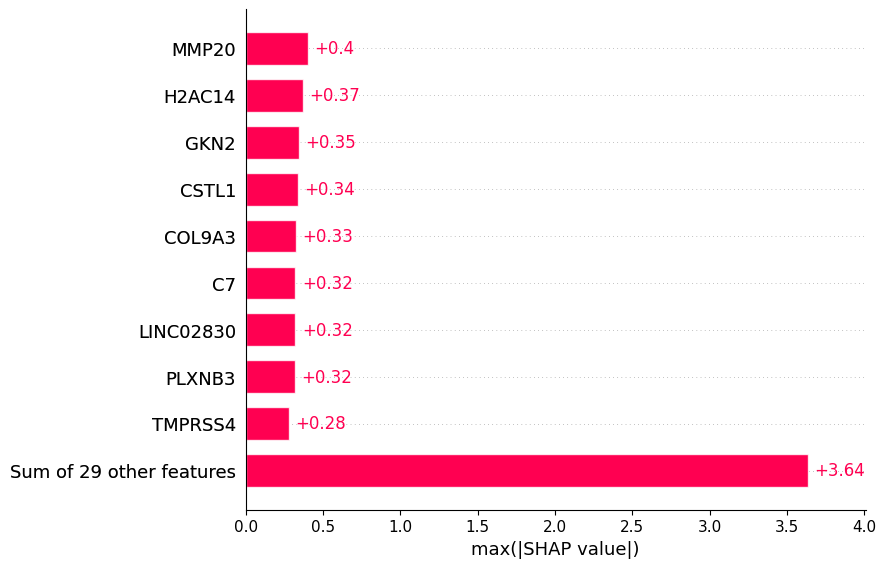

In [ ]:
shap.plots.bar(shap_values.abs.max(0))

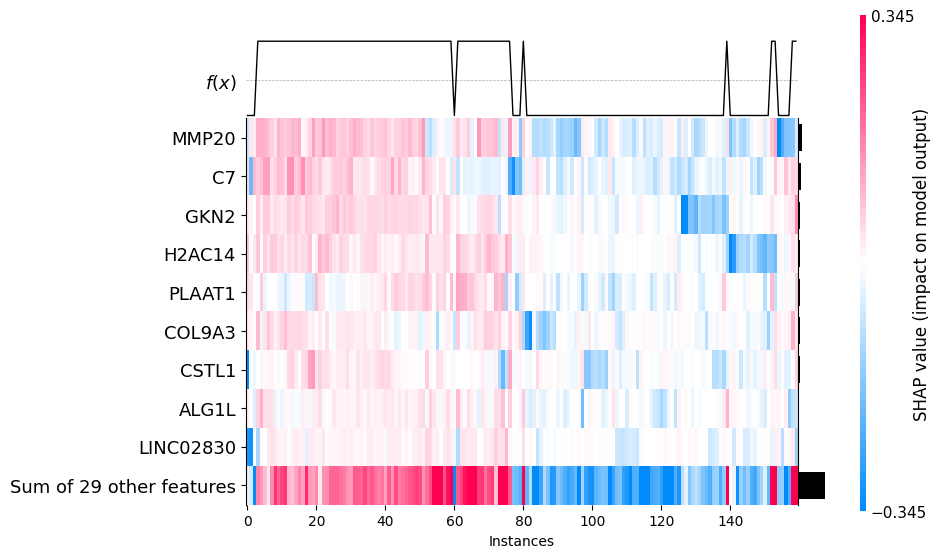

<Axes: xlabel='Instances'>

In [ ]:
shap.plots.heatmap(shap_values[:1000])

In [ ]:
clustering = shap.utils.hclust(X_test, y_test)

39it [00:22,  1.00s/it]


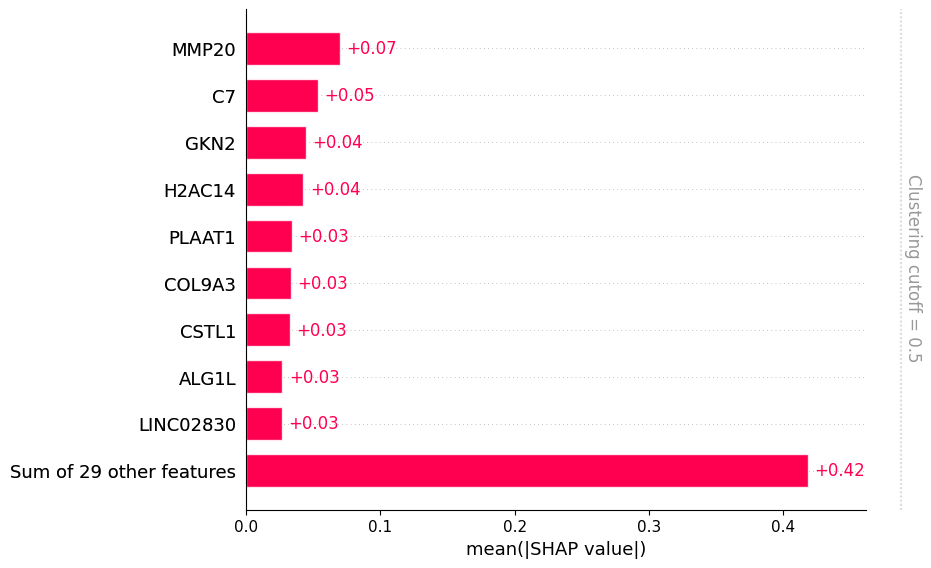

In [ ]:
shap.plots.bar(shap_values, clustering=clustering)

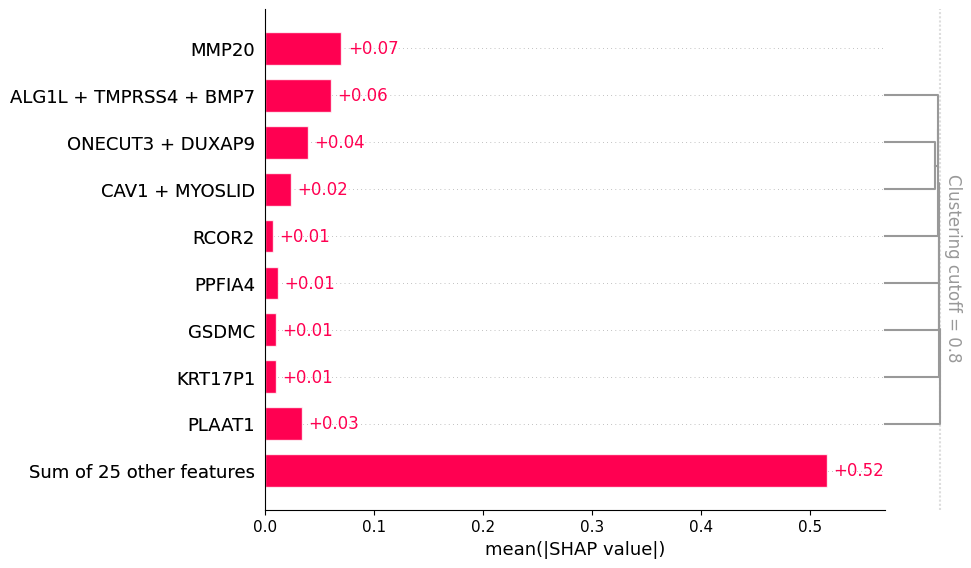

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)

In [ ]:
shap.initjs()
# visualize the first prediction's explanation
shap.plots.force(shap_values[68, ...])

In [ ]:
shap.initjs()
# visualize the first prediction's explanation
shap.plots.force(shap_values[150, ...])